In [1]:
import lightgbm as lgb

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=pd.read_excel('/content/combine_19_20_21_sale.xlsx')

In [5]:
df.head()

,Unnamed: 0,Created Date,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income
0,0,2019-01-03,68,90,42,6583.000000,100885.000000,100885.0
1,1,2019-01-04,69,85,46,6542.500000,112823.177778,25694.2
2,2,2019-01-05,53,82,22,11057.800000,92705.000000,92705.0
3,3,2019-01-06,58,16,12,5815.000000,41483.776667,14062.0
4,4,2019-01-07,60,89,63,7918.583333,108119.473333,109814.0


In [6]:
df=df.drop(['Unnamed: 0'],axis=1)

In [7]:
df['year'] = df['Created Date'].dt.year
df['month'] = df['Created Date'].dt.month
df['day'] = df['Created Date'].dt.month


df['weekday'] = df['Created Date'].dt.dayofweek

df['quarter'] = df['Created Date'].dt.quarter

In [8]:
df=df.drop(['Created Date'],axis=1)

In [9]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [10]:
encode(df,'month',12)
encode(df,'day',365)
encode(df,'weekday',7)
encode(df,'quarter',4)

,TMAX,Completed_Jobs,tech_count,Avg_Sales,Zip_income,Income,year,month,day,weekday,quarter,month_sin,month_cos,day_sin,day_cos,weekday_sin,weekday_cos,quarter_sin,quarter_cos
0,68,90,42,6583.000000,100885.000000,100885.00,2019,1,1,3,1,0.500000,0.866025,0.017213,0.999852,0.433884,-0.900969,1.000000e+00,6.123234e-17
1,69,85,46,6542.500000,112823.177778,25694.20,2019,1,1,4,1,0.500000,0.866025,0.017213,0.999852,-0.433884,-0.900969,1.000000e+00,6.123234e-17
2,53,82,22,11057.800000,92705.000000,92705.00,2019,1,1,5,1,0.500000,0.866025,0.017213,0.999852,-0.974928,-0.222521,1.000000e+00,6.123234e-17
3,58,16,12,5815.000000,41483.776667,14062.00,2019,1,1,6,1,0.500000,0.866025,0.017213,0.999852,-0.781831,0.623490,1.000000e+00,6.123234e-17
4,60,89,63,7918.583333,108119.473333,109814.00,2019,1,1,0,1,0.500000,0.866025,0.017213,0.999852,0.000000,1.000000,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,81,222,126,3494.939333,210099.110000,210099.11,2021,4,4,4,2,0.866025,-0.500000,0.068802,0.997630,-0.433884,-0.900969,1.224647e-16,-1.000000e+00
722,68,168,75,4079.521639,119775.950000,119775.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00
723,69,202,124,3481.447857,230699.430000,230699.43,2021,5,5,2,2,0.500000,-0.866025,0.085965,0.996298,0.974928,-0.222521,1.224647e-16,-1.000000e+00
724,68,109,75,4314.042857,112431.950000,112431.95,2021,5,5,5,2,0.500000,-0.866025,0.085965,0.996298,-0.974928,-0.222521,1.224647e-16,-1.000000e+00


In [11]:
df=df.drop(['month', 'day', 'weekday', 'quarter'],axis=1)

In [12]:
df['year'] = df['year'].map({2019: 0, 2020: 1,2021:2})

In [13]:
df['f1']=np.abs(df['Completed_Jobs'])*np.abs(df['Zip_income'])
df['f2']=np.sqrt(df['Completed_Jobs']**3)*np.abs(df['Avg_Sales'])
df['f3']=np.abs(np.sqrt(df['Completed_Jobs']) - np.sqrt(df['tech_count']))
df['f4']=np.log(np.sqrt(df['Completed_Jobs'])*df['TMAX']**3)

In [14]:
df1=df[['f1', 'f2','f3', 'f4','year',  'month_cos',  'quarter_sin','Income']]

In [15]:
df1=df1.drop_duplicates(ignore_index=True)

In [16]:
train=df1[0:600]
test=df1[600:]

In [17]:

y=train['Income']
X=train.drop(['Income'],axis=1)

In [18]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [19]:
model = lgb.LGBMRegressor()


In [20]:
model.fit(X,y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [21]:
model.score(X,y)

0.9231209905204307

In [22]:
model.score(X_,y_)

0.5617285525117262

In [23]:
y_pred=model.predict(X_)

In [24]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

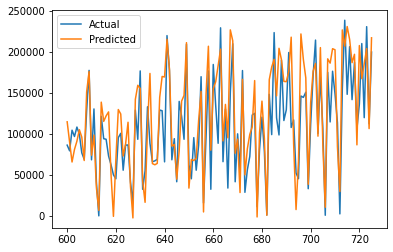

In [25]:
comp.plot()

# Hyperparamter tuning

In [26]:
model_1= lgb.LGBMRegressor(boosting_type='gbdt',learning_rate= 0.1,n_estimators = 20,max_depth = 0,num_leaves = 31,min_child_samples =20,n_jobs =-1,bagging_freq =0,bagging_fraction =0.9)

In [27]:
model_1.fit(X,y)

LGBMRegressor(bagging_fraction=0.9, bagging_freq=0, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.1, max_depth=0, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [28]:
model_1.score(X,y)

0.7768769705951076

In [29]:
model_1.score(X_,y_)

0.6877635372963065

In [30]:
y_pred_1=model_1.predict(X_)

In [31]:
comp_1=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

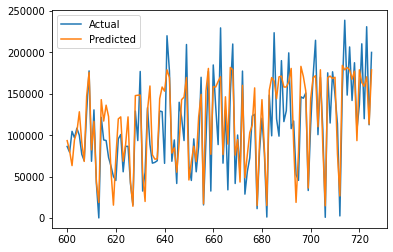

In [32]:
comp_1.plot()

In [33]:
from sklearn import metrics

In [34]:
np.sqrt(metrics.mean_squared_error(y_,y_pred_1))

31704.31590472695